In [1]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(1)

In [2]:
class Bandit:
    def __init__(self, ground_truth, epsilon):
        self.k = len(ground_truth)
        self.epsilon = epsilon
        self.ground_truth = ground_truth

    def _select_action(self):
        if rng.random() < self.epsilon:
            # Exploration
            return rng.integers(0, self.k)
        else:
            # Exploitation
            return np.argmax(self.q_values)

    def _get_reward_from_action(self, a):
        return rng.normal(self.ground_truth[a], 1)

    def launch(self, n):
        rewards_history = np.full(n, 0.0)  # for plotting
        accum_reward = 0.0
        # mapping between action and value (sample-average method)
        self.q_values = np.full(self.k, 0.0)
        self.action_counts = np.full(self.k, 0.0)

        for i in range(n):
            a = self._select_action()
            r = self._get_reward_from_action(a)
            self.action_counts[a] += 1
            accum_reward += r
            rewards_history[i] = accum_reward / (i + 1)
            # update average value of action
            self.q_values[a] += (r - self.q_values[a]) / self.action_counts[a]

        return rewards_history, self.q_values

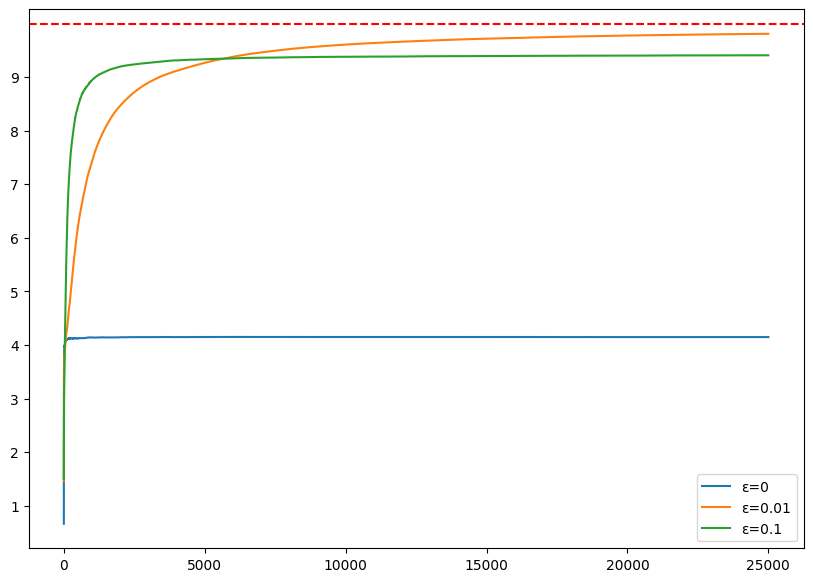

In [3]:
N = 25000  # steps
RUN_COUNT = 20  # runs count of bandit algo
x = np.linspace(0, N, N)
ground_truth = np.array([1, 10, 2, 3, 7, 6, 4, 6, 2, 1])
arms_count = len(ground_truth)

fig = plt.figure(figsize=(10, 7))
qvalues_by_epsilon = []

epsilons = [0, 0.01, 0.1]
for epsilon in epsilons:
    run_rewards = []
    qvalues = []
    for _ in range(RUN_COUNT):  # reduce noise
        b = Bandit(ground_truth, epsilon)
        r, q = b.launch(N)
        run_rewards.append(r)
        qvalues.append(q)

    averaged_rewards = np.zeros(N)
    averaged_qvalues = np.zeros(arms_count)

    for i in range(RUN_COUNT):
        averaged_rewards += run_rewards[i]
        averaged_qvalues += qvalues[i]

    averaged_rewards /= len(run_rewards)
    averaged_qvalues /= len(qvalues)
    qvalues_by_epsilon.append(averaged_qvalues)

    plt.plot(x, averaged_rewards, label=f'ε={epsilon}')

max_exp = max(ground_truth)
plt.axhline(y=max_exp, color='r', linestyle='--')
plt.yticks(np.arange(min(ground_truth), max_exp, 1))

plt.legend()
plt.show()

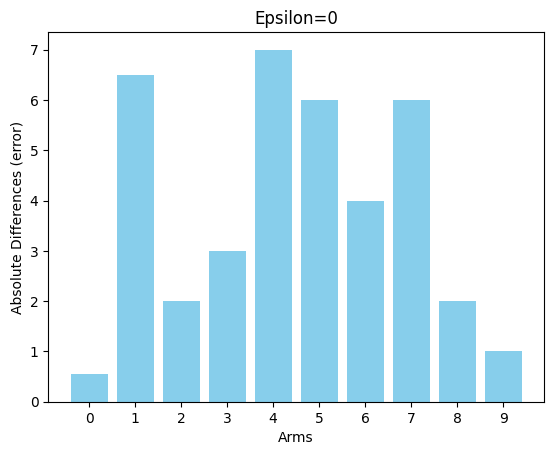

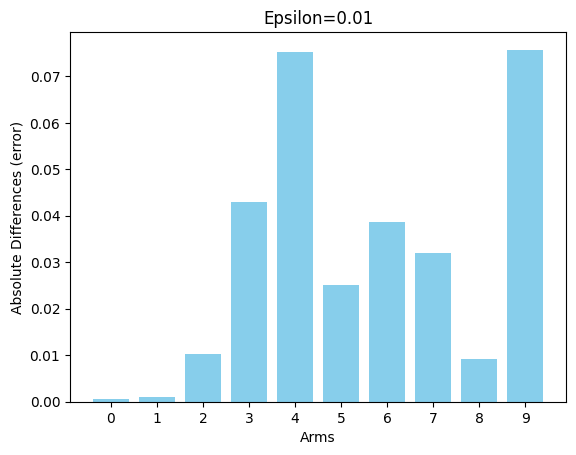

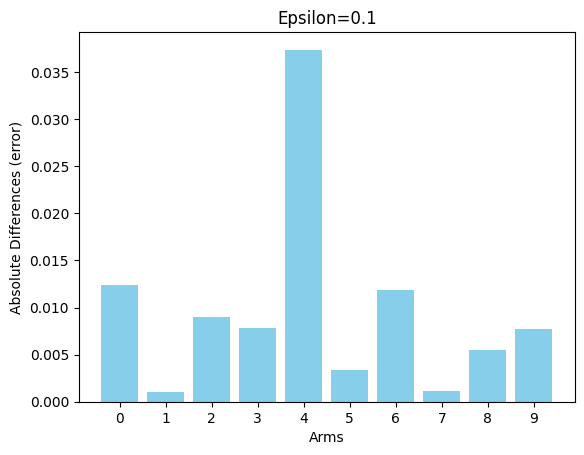

In [4]:
for i in range(len(epsilons)):
    epsilon = epsilons[i]
    qv = qvalues_by_epsilon[i]
    diff_from_ground_truth = np.abs(ground_truth - qv)

    plt.bar(
        np.arange(len(diff_from_ground_truth)), diff_from_ground_truth, color='skyblue'
    )
    plt.xlabel('Arms')
    plt.ylabel('Absolute Differences (error)')
    plt.title(f'Epsilon={epsilon}')
    plt.xticks(np.arange(len(diff_from_ground_truth)))
    plt.show()